## Churn Rate Project

This project is to find out the target group when the company launches a new credit card and it uses Citibank as a benchmark.

### Data Exploration

In [55]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data

dat = pd.read_csv("CITI Credit Card.csv")

# Display the first five rows of the data
dat.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# Drop the last two columns since they are not helpful to find out the target group

dat.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1, inplace = True)

In [4]:
dat.shape

(10127, 21)

The data has 10127 rows and 21 columns.

In [5]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
# Check whether the data containing missing values
dat_contain_missing_value_per = pd.DataFrame({"MissingValuePercent": dat.isnull().sum()*100/dat.shape[0]})
dat_contain_missing_value_per.loc[dat_contain_missing_value_per['MissingValuePercent'] > 0]

,MissingValuePercent


Thus, it does not contain missing values.

In [7]:
# Data frame only contains numeric variables and Attrition_Flag
dat_num = dat.select_dtypes(include='number')
dat_num['Attrition_Flag']  = dat.loc[:, 'Attrition_Flag']
dat_num.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,Existing Customer
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,Existing Customer
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,Existing Customer
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,Existing Customer
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,Existing Customer


In [8]:
# Data frame only contains categorical variable and Attrition_Flag
dat_cat = dat.select_dtypes(include='object')
dat_cat['Attrition_Flag'] = dat['Attrition_Flag']
dat_cat.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


### Visualizing numeric variable esxcept CLIENTNUM

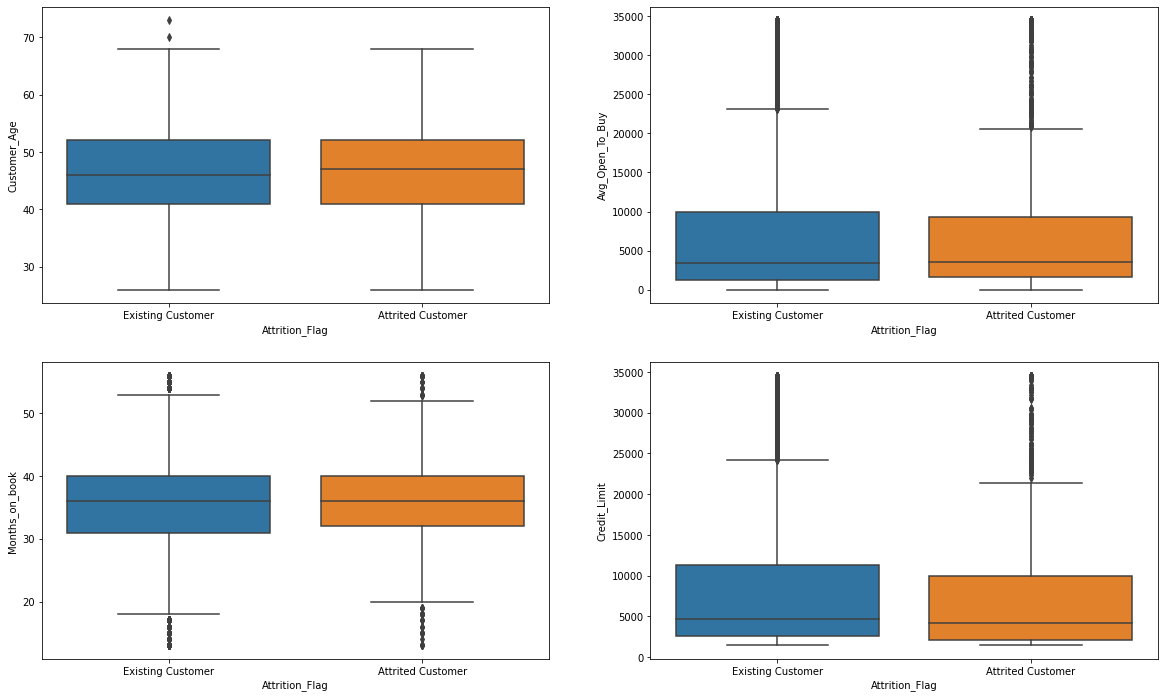

In [9]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(data=dat_num, y="Customer_Age", x="Attrition_Flag")
plt.subplot(2,2,2)
sns.boxplot(data=dat_num, y="Avg_Open_To_Buy", x="Attrition_Flag")
plt.subplot(2,2,3)
sns.boxplot(data=dat_num, y="Months_on_book", x="Attrition_Flag")
plt.subplot(2,2,4)
sns.boxplot(data=dat_num, y="Credit_Limit", x="Attrition_Flag");

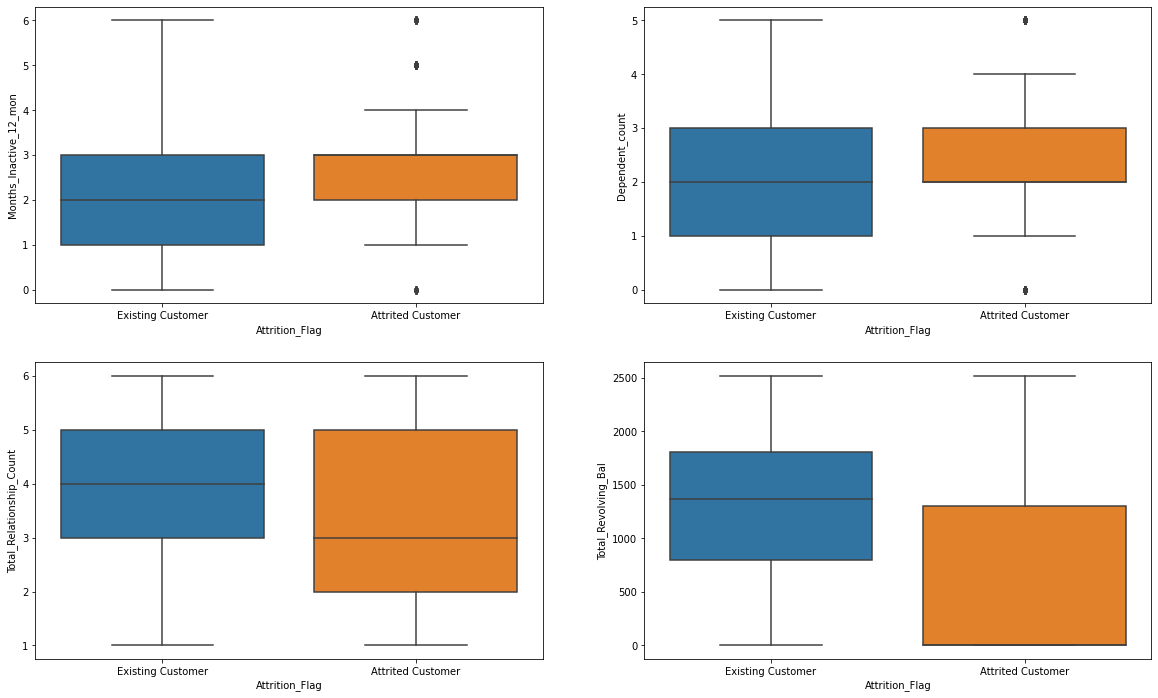

In [10]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(data=dat_num, y="Months_Inactive_12_mon", x="Attrition_Flag")
plt.subplot(2,2,2)
sns.boxplot(data=dat_num, y="Dependent_count", x="Attrition_Flag")
plt.subplot(2,2,3)
sns.boxplot(data=dat_num, y="Total_Relationship_Count", x="Attrition_Flag")
plt.subplot(2,2,4)
sns.boxplot(data=dat_num, y="Total_Revolving_Bal", x="Attrition_Flag");

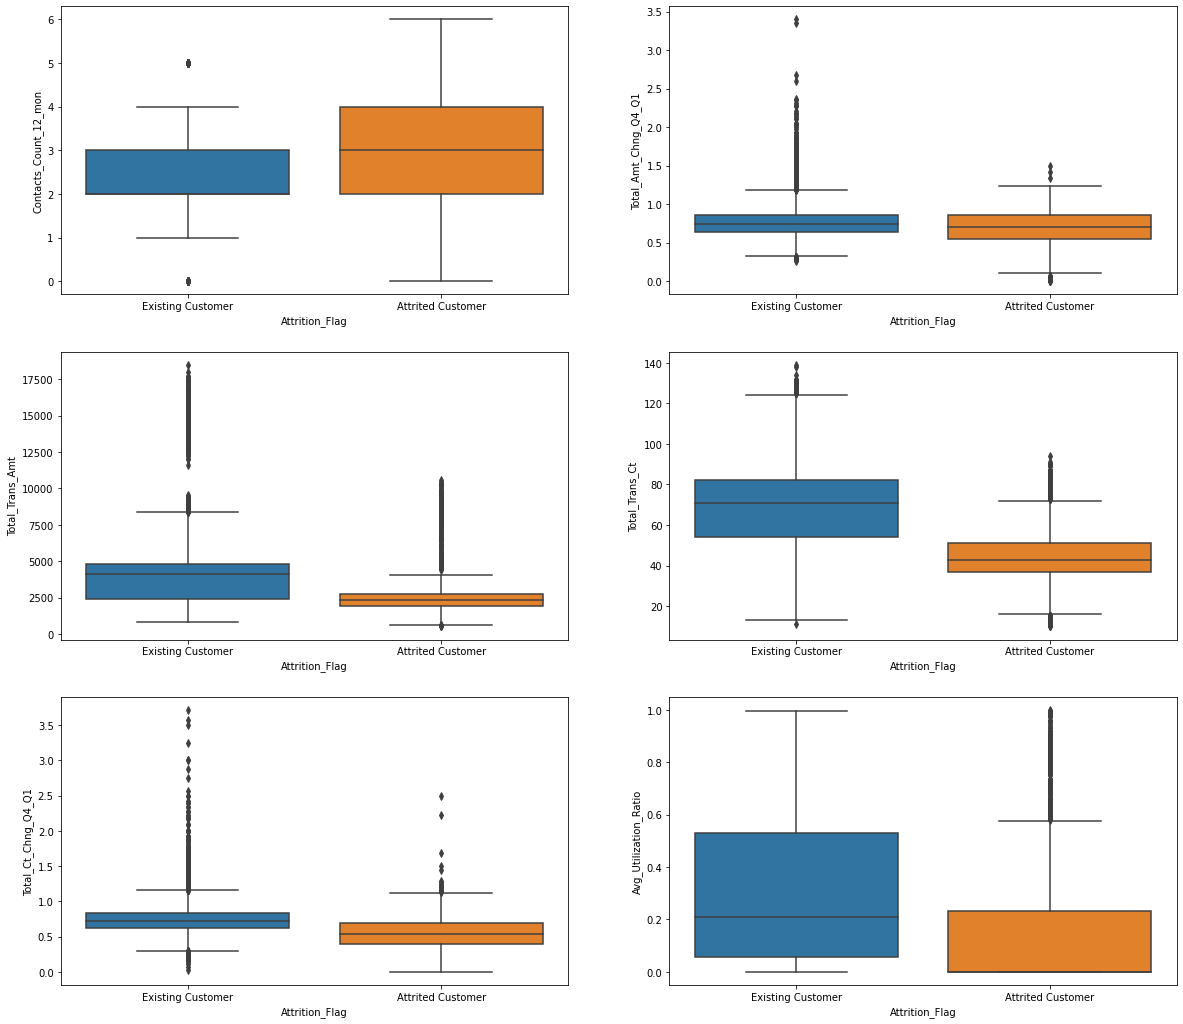

In [11]:
plt.figure(figsize=(20, 18))
plt.subplot(3,2,1)
sns.boxplot(data=dat_num, y="Contacts_Count_12_mon", x="Attrition_Flag")
plt.subplot(3,2,2)
sns.boxplot(data=dat_num, y="Total_Amt_Chng_Q4_Q1", x="Attrition_Flag")
plt.subplot(3,2,3)
sns.boxplot(data=dat_num, y="Total_Trans_Amt", x="Attrition_Flag")
plt.subplot(3,2,4)
sns.boxplot(data=dat_num, y="Total_Trans_Ct", x="Attrition_Flag")
plt.subplot(3,2,5)
sns.boxplot(data=dat_num, y="Total_Ct_Chng_Q4_Q1", x="Attrition_Flag")
plt.subplot(3,2,6)
sns.boxplot(data=dat_num, y="Avg_Utilization_Ratio", x="Attrition_Flag");

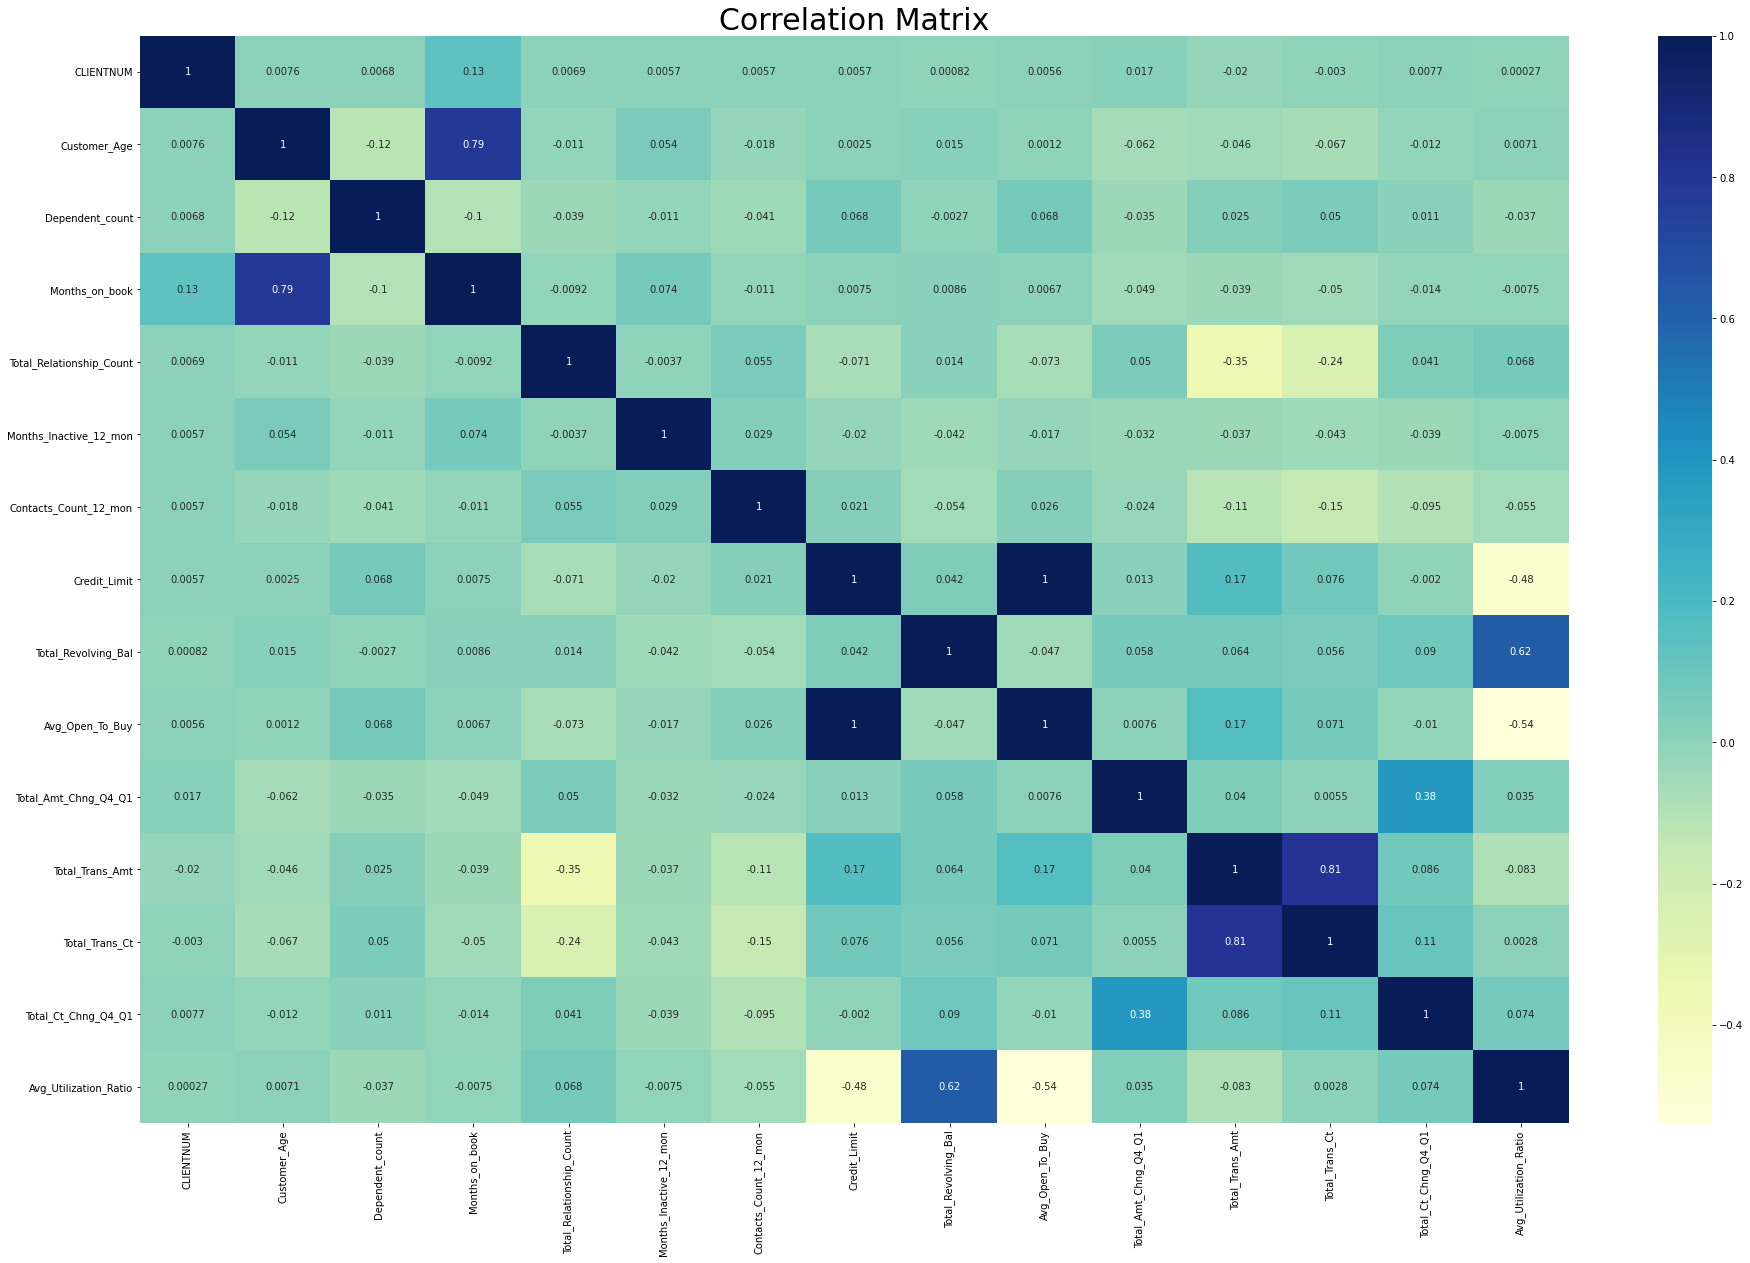

In [12]:
# Check the correlation between numeric variables
plt.figure(figsize = (32, 20))
sns.heatmap(dat_num.corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation Matrix", fontsize = 30)
plt.show();

In [13]:
# Correlation >= 0.5
dat.corr()[abs(dat.corr() >= 0.5)]

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,NaN,1.000000,NaN,0.788912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,NaN,0.788912,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Relationship_Count,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_Inactive_12_mon,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contacts_Count_12_mon,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_Limit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.995981,NaN,NaN,NaN,NaN,NaN
Total_Revolving_Bal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.624022
Avg_Open_To_Buy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995981,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


From the dataframe above, highly correlated variables:

1. Months_on_book and Customer_Age (0.789)
2. Avg_Open_To_Buy and Credit_Limit (0.996)
3. Total_Trans_Ct and Total_Trans_Amt (0.807)
4. Avg_Utilization_Ratio and Total_Revolving_Bal (0.624)

### Visualizing categorical  variable

In [14]:
dat_cat['Attrition_Flag_Existing Customer'] = pd.get_dummies(dat_cat[['Attrition_Flag']], drop_first = True)['Attrition_Flag_Existing Customer']

In [15]:
dat_cat.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Attrition_Flag_Existing Customer'],
      dtype='object')

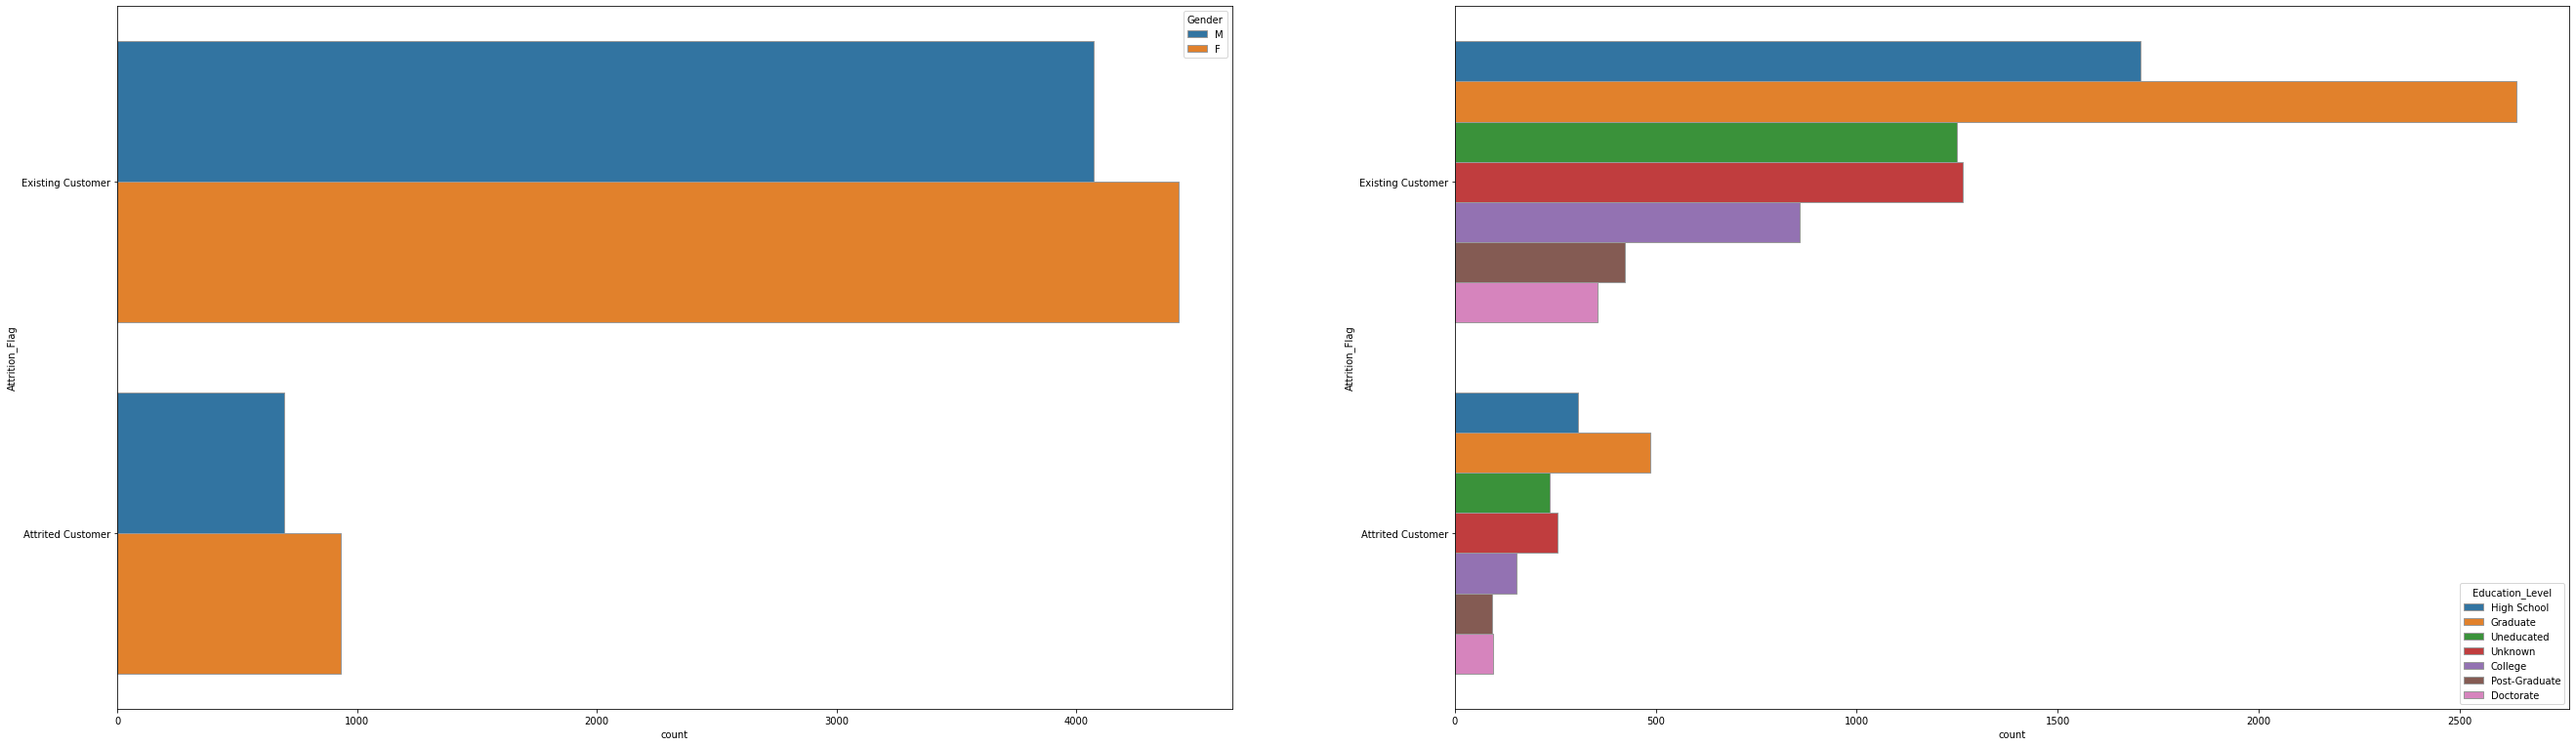

In [16]:
plt.figure(figsize=(45, 45))
plt.subplot(3,2,1)
sns.countplot(y="Attrition_Flag", hue="Gender", edgecolor=".6", data=dat_cat)
plt.subplot(3,2,2)
sns.countplot(y="Attrition_Flag", hue="Education_Level", edgecolor=".6", data=dat_cat);


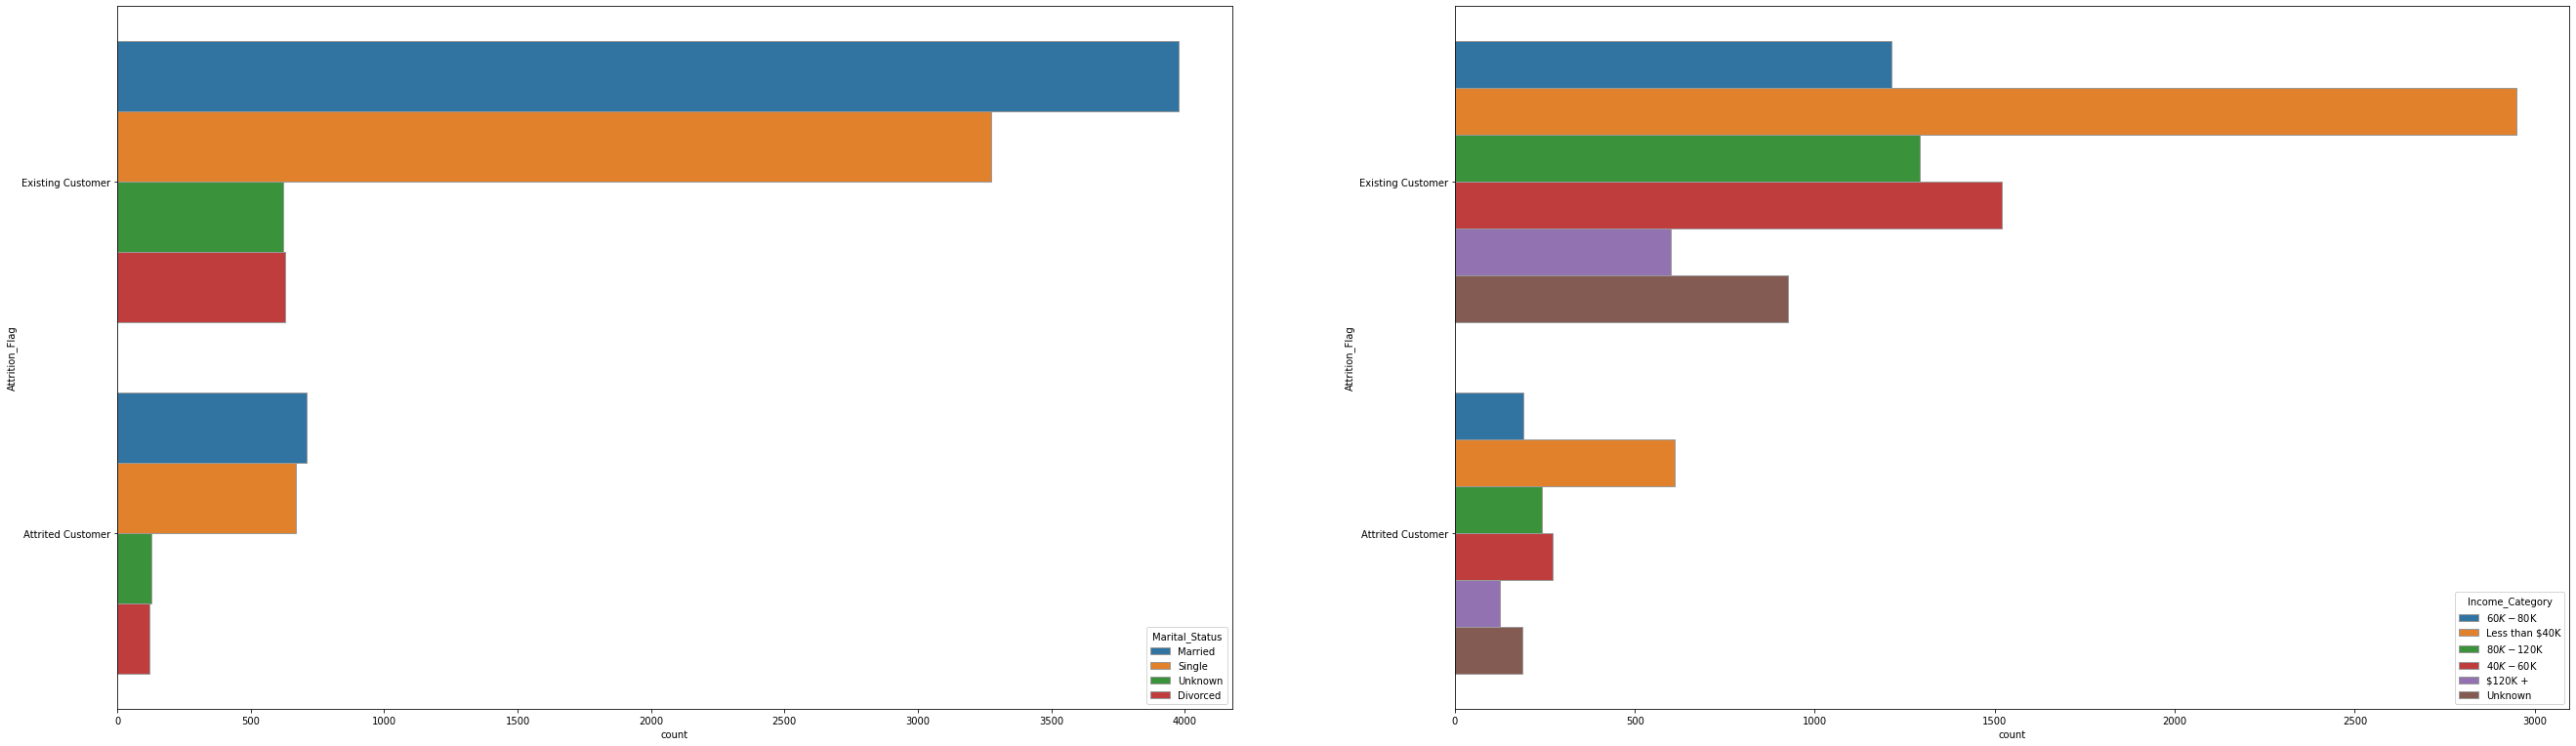

In [17]:
plt.figure(figsize=(45, 45))
plt.subplot(3,2,1)
sns.countplot(y="Attrition_Flag", hue="Marital_Status", edgecolor=".6",data=dat_cat)
plt.subplot(3,2,2)
sns.countplot(y="Attrition_Flag", hue="Income_Category", edgecolor=".6",data=dat_cat);

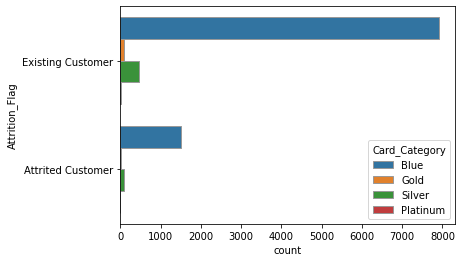

In [18]:
sns.countplot(y="Attrition_Flag", hue="Card_Category", edgecolor=".6",data=dat_cat);

## Model Building

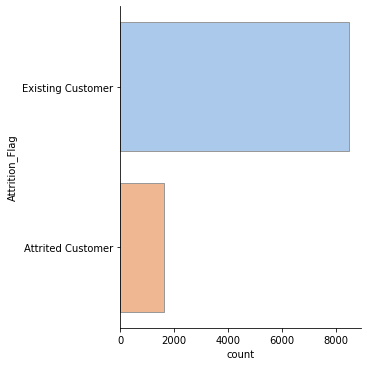

In [19]:
sns.catplot(y="Attrition_Flag", kind="count",palette="pastel", edgecolor=".6",data=dat_cat);

From the plot above, we can see that in the dataset, there are more existing customers than attrited customer. We are going to treat existing customers as the target customer and attrited customers as non-target customers. Thus, when we split the train and test data, we cannot just split it by random. We have. to spilt it based on its proportion for each group.

In [20]:
# Transform categorical variables. For the variable has unknown as one of its category, drop the unknown category. 
# For Card Category, drop Platinum
# For Attrition Flag, drop attrited customer becasue this project is to find out target customer.
dat = pd.concat([dat,pd.get_dummies(dat['Gender'], drop_first = True)],axis=1)
dat = pd.concat([dat,pd.get_dummies(dat['Education_Level']).drop(columns=['Unknown'])],axis=1)
dat = pd.concat([dat,pd.get_dummies(dat['Income_Category']).drop(columns=['Unknown'])],axis=1)
dat = pd.concat([dat,pd.get_dummies(dat['Marital_Status']).drop(columns=['Unknown'])],axis=1)
dat = pd.concat([dat,pd.get_dummies(dat['Card_Category']).drop(columns=['Platinum'])],axis=1)
dat.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category','CLIENTNUM', 'Gender'],inplace=True)
dat = pd.get_dummies(dat, drop_first = True)

In [21]:
dat.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver,Attrition_Flag_Existing Customer
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,1,0,0,0,1,0,1,0,0,1
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,1,0,0,1,1,0,0,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,1,0,0,1,0,1,0,0,1
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,1,0,0,0,1,0,0,1
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,1,0,0,0,1,0,1,0,0,1


In [22]:
# Split Train and Test

from sklearn.model_selection import train_test_split

np.random.seed(0)
y = dat.pop('Attrition_Flag_Existing Customer')
x = dat

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4, stratify=y)

In [24]:
# Standardize the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_variable_name = list(dat_num.drop(['Attrition_Flag', 'CLIENTNUM'], axis = 1))
x_train[numeric_variable_name] = scaler.fit_transform(x_train[numeric_variable_name])

Since after One hot coding, there are lots of dummies variables. Thus, we are going to use PCA to reduce dimensions.

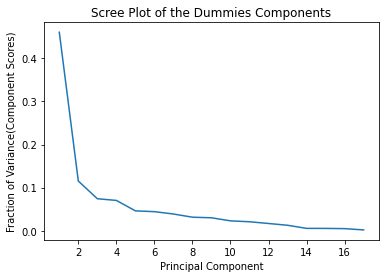

In [25]:
ohe = x_train.iloc[:, 15:]
u, s, vt =  np.linalg.svd(ohe, full_matrices = False)
plt.plot(range(1,18), s ** 2 / np.sum(s ** 2))
plt.xlabel('Principal Component')
plt.ylabel('Fraction of Variance(Component Scores)')
plt.title('Scree Plot of the Dummies Components');

From above, 8 is a reasonable number because the line does not decrease significantly after 8.

In [26]:
from sklearn.decomposition import PCA
N_COMPONENTS = 8

pca_model = PCA(n_components = N_COMPONENTS)

pc_matrix = pca_model.fit_transform(ohe)

evr = pca_model.explained_variance_ratio_
total_var = evr.sum() * 100
cumsum_evr = np.cumsum(evr)

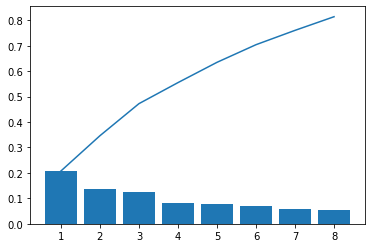

In [27]:
plt.bar(range(1,9), evr)
plt.plot(range(1,9), cumsum_evr);

In [28]:
# Updating x_train and drop all the dummies variables
x_train['pc1'] = pc_matrix[:, 0]
x_train['pc2'] = pc_matrix[:, 1]
x_train['pc3'] = pc_matrix[:, 2]
x_train['pc4'] = pc_matrix[:, 3]
x_train['pc5'] = pc_matrix[:, 4]
x_train['pc6'] = pc_matrix[:, 5]
x_train['pc7'] = pc_matrix[:, 6]
x_train['pc8'] = pc_matrix[:, 7]
x_train.drop(['M',
       'College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated', '$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Divorced', 'Married', 'Single', 'Blue', 'Gold',
       'Silver'], axis = 1, inplace = True)

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def cross_validate_accuracy(model, X, y):
    model = clone(model)
    five_fold = StratifiedKFold(n_splits=5)
    accuracy = []
    for tr_ind, va_ind in five_fold.split(X, y):
        model.fit(X.iloc[tr_ind,:], y.iloc[tr_ind])
        accuracy.append(np.mean(model.predict(X.iloc[va_ind,:]) == y.iloc[va_ind]))
    return np.mean(accuracy)

In [30]:
# RFE to select variables

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
# Get the mean accuracy respect to the number of features
accuracy = []
for i in range(1, 23):
    rfe = RFE(logreg, i)  
    accuracy = np.append(accuracy, cross_validate_accuracy(rfe, x_train, y_train))

In [31]:
accuracy

array([0.83295606, 0.82308031, 0.86737978, 0.88163008, 0.8927779 ,
       0.89828   , 0.89785618, 0.90025491, 0.90138257, 0.90194684,
       0.90335788, 0.90293474, 0.90307559, 0.90222913, 0.90265236,
       0.90237017, 0.9027934 , 0.90222933, 0.90222933, 0.90222933,
       0.90208838, 0.90194724])

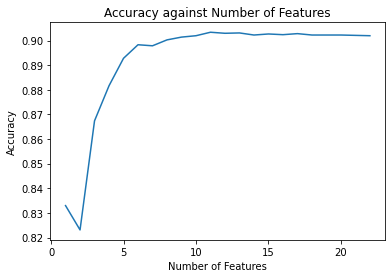

In [32]:
plt.plot(range(1, 23),accuracy)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Accuracy against Number of Features");

In [33]:
temp = list(accuracy[1:])
best_number = temp.index(max(temp))
best_number

9

When there are 9 number of feactures, it obtains the maximum accuracy.

In [34]:
rfe = RFE(logreg, 9)
rfe = rfe.fit(x_train, y_train.values.ravel())
col = x_train.columns[rfe.support_]
col

Index(['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'pc1', 'pc2'],
      dtype='object')

Above are the variables that I am going to use for the logistic regression.

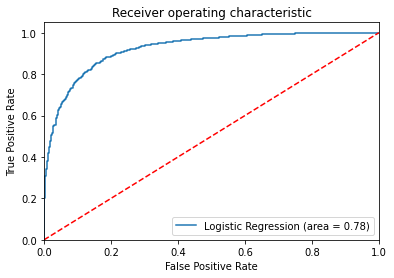

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
x_train = x_train[col]
logreg = LogisticRegression(fit_intercept=True, solver = 'lbfgs', max_iter=1000)
logreg.fit(x_train, y_train)

logit_roc_auc = roc_auc_score(y_train, logreg.predict(x_train))
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(x_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [36]:
# Perform cross-validation to find the best thresholds
def compute_CV_accuracy_with_T(model, X_train, Y_train, threshold):
    kf = StratifiedKFold(n_splits=5)
    validation_accuracy = []
    
    for train_idx, valid_idx in kf.split(X_train, Y_train):

        split_X_train, split_X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]

        model.fit(split_X_train, split_Y_train)
        Y_val_predict_probability = model.predict_proba(split_X_valid)[:, 1]
        Y_val_predict = Y_val_predict_probability > threshold
        Y_val_predict = [int(elem) for elem in Y_val_predict]
        accuracy = np.mean(Y_val_predict == split_Y_valid)
        validation_accuracy.append(accuracy)
        
    return np.mean(validation_accuracy)

thresholds = np.arange(0.4, 0.6, 0.01)
val_accuracies = []
model = LogisticRegression(fit_intercept=True, solver = 'lbfgs', max_iter=2000)
for t in thresholds:
    accuracy_val = compute_CV_accuracy_with_T(model, x_train, y_train, t)
    val_accuracies.append(accuracy_val)

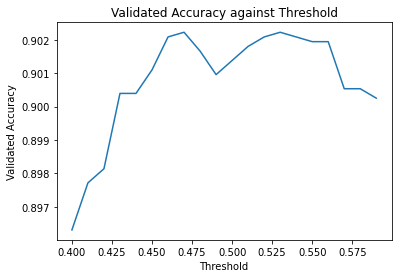

In [37]:
plt.plot(np.arange(0.4, 0.6, 0.01), val_accuracies)
plt.xlabel("Threshold")
plt.ylabel("Validated Accuracy")
plt.title("Validated Accuracy against Threshold");

In [38]:
temp = list(val_accuracies[1:])
best_t = temp.index(max(temp))
np.arange(0.4, 0.6, 0.01)[best_t]

0.4600000000000001

**Choose 0.46 as the threshold because it obtains the best validated accuracy.**

In [56]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train, x_train, threshold=0.46)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                               Results: Logit
Model:              Logit                            Pseudo R-squared: inf   
Dependent Variable: Attrition_Flag_Existing Customer AIC:              inf   
Date:               2021-05-27 10:45                 BIC:              inf   
No. Observations:   7088                             Log-Likelihood:   -inf  
Df Model:           8                                LL-Null:          0.0000
Df Residuals:       7079                             LLR p-value:      1.0000
Converged:          1.0000                           Scale:            1.0000
No. Iterations:     6.0000                                                   
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------

From the summary table above, we can see that all the variables are significant becasue their p-values are extremely small.

## Model Evaluation

In [40]:
# Standardize test data
x_test[numeric_variable_name] = scaler.fit_transform(x_test[numeric_variable_name])

In [41]:
# Perform PCA
ohe_test = x_test.iloc[:, 15:]
pca_model_test = PCA(n_components = N_COMPONENTS)
pc_matrix_test = pca_model_test.fit_transform(ohe_test)
x_test['pc1'] = pc_matrix_test[:, 0]
x_test['pc2'] = pc_matrix_test[:, 1]
x_test['pc3'] = pc_matrix_test[:, 2]
x_test['pc4'] = pc_matrix_test[:, 3]
x_test['pc5'] = pc_matrix_test[:, 4]
x_test['pc6'] = pc_matrix_test[:, 5]
x_test['pc7'] = pc_matrix_test[:, 6]
x_test['pc8'] = pc_matrix_test[:, 7]
x_test.drop(['M',
       'College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated', '$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Divorced', 'Married', 'Single', 'Blue', 'Gold',
       'Silver'], axis = 1, inplace = True)

In [42]:
x_test = x_test[col]

In [43]:
logreg = LogisticRegression(fit_intercept=True)
logreg.fit(x_train, y_train)
y_pred_prob = logreg.predict_proba(x_test)[:, 1]
threshold = 0.46
y_pred = y_pred_prob > threshold
y_pred = [int(elem) for elem in y_pred]
test_accuracy = np.mean(y_pred == y_test)
test_accuracy

0.9002961500493584

### Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 252  236]
 [  67 2484]]


There are 252 true negative, 67 false negative, 236 false positive, and 2484 true positive. Thus, there are 2736 correct predictions (sum of true positive and true negative) and 303 incorrect predictions (sum of false negative and false positive).

### Precision and Recall

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

In [45]:
tn, fp, fn, tp = confusion_matrix.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)

In [46]:
precision

0.913235294117647

In [47]:
recall

0.973735789886319

### ROC Curve

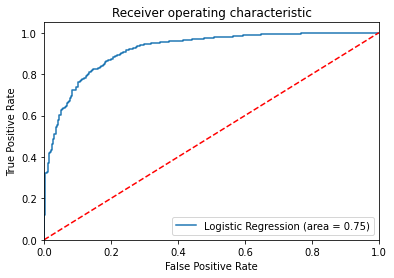

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

Based on the statistics above, the final model is reasonable.

## Fit the model using the entire data

In [49]:
# Reduce Dimensions
ohe_dat = dat.iloc[:, 15:]
pca_model_dat = PCA(n_components = N_COMPONENTS)
pc_matrix_dat = pca_model_dat.fit_transform(ohe_dat)
dat['pc1'] = pc_matrix_dat[:, 0]
dat['pc2'] = pc_matrix_dat[:, 1]
dat['pc3'] = pc_matrix_dat[:, 2]
dat['pc4'] = pc_matrix_dat[:, 3]
dat['pc5'] = pc_matrix_dat[:, 4]
dat['pc6'] = pc_matrix_dat[:, 5]
dat['pc7'] = pc_matrix_dat[:, 6]
dat['pc8'] = pc_matrix_dat[:, 7]
dat.drop(['M',
       'College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated', '$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Divorced', 'Married', 'Single', 'Blue', 'Gold',
       'Silver'], axis = 1, inplace = True)

In [50]:
# Standardize variables
dat[numeric_variable_name] = scaler.fit_transform(dat[numeric_variable_name])

In [51]:
# Select the features
dat = dat[col]

In [52]:
# Fit the logistic regression model
final_model = LogisticRegression(fit_intercept=True)
final_model.fit(dat, y)
y_pred_prob = logreg.predict_proba(dat)[:, 1]
threshold = 0.46
y_pred = y_pred_prob > threshold
y_pred = [int(elem) for elem in y_pred]

In [53]:
# Accuracy
accuracy = np.mean(y_pred == y)
accuracy

0.9000691221487114

In [57]:
# Get the summary output
temp = sm.add_constant(dat)
final_model=sm.Logit(y, temp, threshold=0.46)
result=final_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                               Results: Logit
Model:              Logit                            Pseudo R-squared: inf   
Dependent Variable: Attrition_Flag_Existing Customer AIC:              inf   
Date:               2021-05-27 10:45                 BIC:              inf   
No. Observations:   10127                            Log-Likelihood:   -inf  
Df Model:           9                                LL-Null:          0.0000
Df Residuals:       10117                            LLR p-value:      1.0000
Converged:          1.0000                           Scale:            1.0000
No. Iterations:     8.0000                                                   
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------

**Logistic Regression Equation**

$$\hat{Predicted Probability} = \frac{1}{1 + e^{-\alpha}}$$ 

where 

$\alpha = 3.0038 + 0.7122TotalRelationshipCount - 0.4975MonthsInactive12Mon - 0.5491ContactsCount12Mon + 0.7767TotalRevolvingBal -1.6086TotalTransAmt + 2.7313TotalTransCt + 0.7056TotalCtChngQ4Q1 - 0.6696PC1 - 0.1927PC2$


## For Future Data

1. Load the data frame and assign the name of the data frame as test_dat, and remove missing values
    
    test = pd.read_csv("the name of the dataset file")
    

2. Standardize test data

    test[numeric_variable_name] = scaler.fit_transform(test[numeric_variable_name])
    
    
3. Transform Categorical to dummy varables and then perform PCA (use 8 as number of components) to those dummies variables to reduce dimensions, add these 8 PC score into the date frame and drop the dummies.

    ohe_test = test.iloc[:, 15:]
    
    pca_model_test = PCA(n_components = N_COMPONENTS)
    
    pc_matrix_test = pca_model_test.fit_transform(ohe_test)
    
    test['pc1'] = pc_matrix_test[:, 0]
    
    test['pc2'] = pc_matrix_test[:, 1]
    
    test['pc3'] = pc_matrix_test[:, 2]
    
    test['pc4'] = pc_matrix_test[:, 3]
    
    test['pc5'] = pc_matrix_test[:, 4]
    
    test['pc6'] = pc_matrix_test[:, 5]
    
    test['pc7'] = pc_matrix_test[:, 6]
    
    test['pc8'] = pc_matrix_test[:, 7]
    
    test.drop(['M','College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', '$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K','Less than $40K' 'Divorced', 'Married', 'Single', 'Blue', 'Gold', 'Silver'], axis = 1, inplace = True)


4. Use 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'pc1', 'pc2' as the features and pass it to the logistic regression model above to get the prediction.

    test = test[col]
    
    pred_prob = logreg.predict_proba(test)[:, 1]

    threshold = 0.46
    
    pred = y_pred_prob > threshold
    
    pred = [int(elem) for elem in y_pred]

    

6. Check the prediction result (pred). If it is 1, it means this corresponding customer is the target customers.
